In [6]:
from scripts.utils import generate_bppm_from_fastafile, generate_msa_matrix


In [7]:
bppm = generate_bppm_from_fastafile("../data/MSA/1B36_A.MSA.fasta")

0.9907537707709819


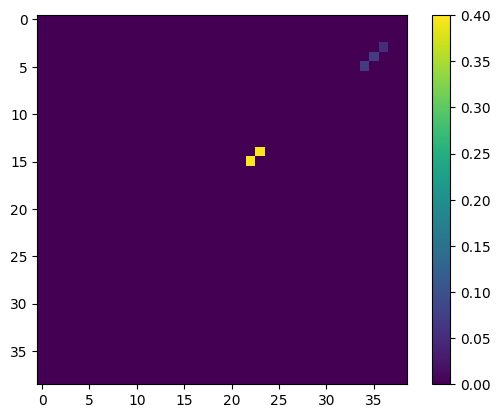

In [8]:
import matplotlib.pyplot as plt
import numpy as np
print(np.sum(bppm))
plt.imshow(bppm)
plt.colorbar()
plt.show()

In [9]:
vocab = {"A": 0, "C": 1, "G": 2, "U": 3, "-":4, "X":5}
msa = generate_msa_matrix("../data/MSA/1B36_A.MSA.fasta", vocab)

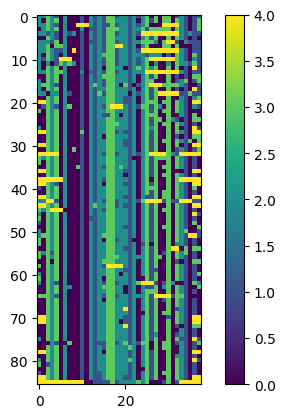

In [10]:
plt.imshow(msa)
plt.colorbar()
plt.show()

In [9]:
from model.utils.alphabet import RNAAlphabet
from model.utils.alphabet import get_features
from Bio import AlignIO

msa_fpath = '../data/MSA/1B36_A.MSA.fasta'
new_fasta_path = '../data/MSA/test.fasta'

alignment = AlignIO.read(msa_fpath, "fasta")
sequences = [record.seq for record in alignment]
print("alignment has ", len(sequences), " sequences")
sequence = ""
with open(msa_fpath, 'r') as f:
    first_line = f.readline()
    sequence = f.readline().split(">")[0]

with open(new_fasta_path, 'w') as f:
    f.write(f">{100}\n")
    f.write(sequence)
    
data_dict = get_features(new_fasta_path, msa_fpath)
alphabet = RNAAlphabet.from_architecture("RNA")
print(alphabet.all_toks)
print(data_dict["rna_fm_tokens"])
print(data_dict["tokens"])
print(data_dict["seq"])


alignment has  86  sequences
['<cls>', '<pad>', '<eos>', '<unk>', 'A', 'U', 'G', 'C', '-', '<null_1>', '<null_2>', '<null_3>', '<null_4>', '<null_5>', '<null_6>', '<null_7>', '<mask>']
tensor([[6, 6, 7, 6, 5, 4, 6, 4, 4, 4, 5, 4, 6, 5, 6, 5, 7, 7, 5, 6, 6, 5, 6, 5,
         6, 7, 4, 7, 4, 7, 7, 4, 5, 6, 5, 4, 5, 5]])
tensor([[[6, 6, 5,  ..., 4, 7, 7],
         [6, 4, 5,  ..., 4, 7, 5],
         [6, 6, 5,  ..., 4, 7, 5],
         ...,
         [7, 4, 5,  ..., 4, 7, 4],
         [8, 8, 5,  ..., 4, 8, 8],
         [8, 8, 8,  ..., 8, 8, 8]]])
GGUGCAGAAACAGCGCUUCGGCGCGUAUAUUACGCACC
